# Programming Assignment # 3 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Sudharsan Srinivasan

ID: 1001755919

Team Mate name : Wajid Ahammed Syed

ID: 1001756597

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.

1.https://mubaris.com/posts/kmeans-clustering/

2.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

3.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

4.https://www.programcreek.com/python/example/103493/sklearn.cluster.AgglomerativeClustering

5.https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

6.https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

7.https://towardsdatascience.com/python-basics-6-lists-and-list-manipulation-a56be62b1f95

## Assignment Details

The purpose of this assignment is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Adult". You can find more information here: https://archive.ics.uci.edu/ml/datasets/adult.
The classification problem is whether they earn more than 50,000$ or not.



You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [35]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [36]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [37]:
df_data = pd.read_csv('clusteringdata.csv', encoding='latin1')

In [38]:
le = LabelEncoder()
Class = le.fit_transform(df_data.Class)
df_data["Class"]=Class
NativeCountry = le.fit_transform(df_data.NativeCountry)
df_data["NativeCountry"]=NativeCountry
Sex= le.fit_transform(df_data.Sex)
df_data["Sex"]=Sex
Race= le.fit_transform(df_data.Race)
df_data["Race"]=Race
Relationship= le.fit_transform(df_data.Relationship)
df_data["Relationship"]=Relationship
Occupation= le.fit_transform(df_data.Occupation)
df_data["Occupation"]=Occupation
Education= le.fit_transform(df_data.Education)
df_data["Education"]=Education
WorkClass= le.fit_transform(df_data.WorkClass)
df_data["WorkClass"]=WorkClass
MaritalStatus= le.fit_transform(df_data.MaritalStatus)
df_data["MaritalStatus"]=MaritalStatus

In [39]:
df_data.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,6,77516,9,13,4,1,1,4,1,2174,0,40,37,0
1,50,5,83311,9,13,2,4,0,4,1,0,0,13,37,0
2,38,3,215646,11,9,0,6,1,4,1,0,0,40,37,0
3,53,3,234721,1,7,2,6,0,2,1,0,0,40,37,0
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,5,0


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

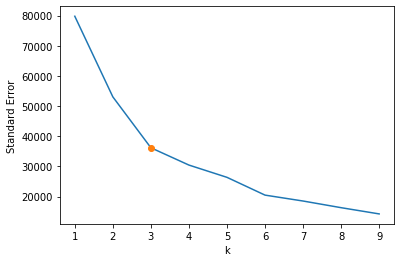

Optimal value for k is 3


In [40]:
#########################begin code for Task 1-a
SSE =[]
#running the loop for a range of values of k and calculating SSE
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(df_data)
    SSE.append(sum(np.min(cdist(df_data,kmeans.cluster_centers_,'euclidean'),axis=1))/df_data.shape[0])
import matplotlib.pyplot as plt
plt.plot(range(1, 10), SSE)
plt.xlabel('k')
plt.plot(3, SSE[2], marker='o')
plt.ylabel('Standard Error')
plt.show()
print("Optimal value for k is 3")
#########################end code for Task 1-a

In [41]:
df_data["Class"]

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Class, Length: 5000, dtype: int32

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [42]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
X_training = df_data.sample(frac=0.70, random_state=0)
X_testing = df_data.drop(X_training.index)
y_training = X_training.pop('Class')
y_testing = X_testing.pop('Class')
###################end code for Task 1-b-1

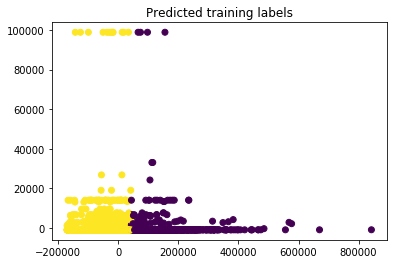

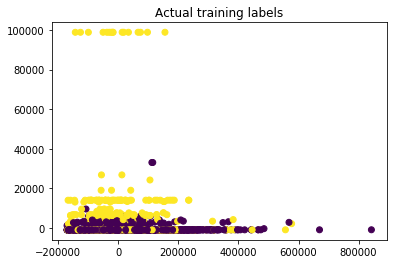

In [43]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model for k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_training)

# Compute cluster centers and predict cluster index for each sample 

clusterindex=kmeans.predict(X_training)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_training)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

#plotting the graphs
plt.title("Predicted training labels")
plt.scatter(x,y,c=clusterindex)
plt.show()
plt.title("Actual training labels")
plt.scatter(x,y,c=y_training)
plt.show()
###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

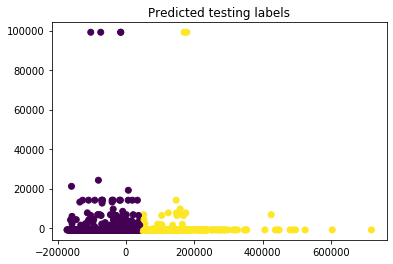

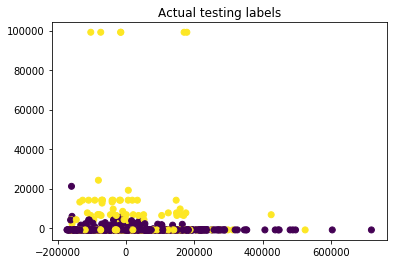

In [44]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_testing)
# predict cluster index for each sample 
clusterindex1=kmeans.predict(X_testing)
# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_testing)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

#plotting the graphs
plt.title("Predicted testing labels")
plt.scatter(x,y,c=clusterindex1)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_testing)
plt.show()
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [45]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print("Confusion matrix for training data \n",confusion_matrix(y_training,clusterindex))
print("Confusion matrix for training data \n",confusion_matrix(y_testing,clusterindex1))

###################end code for Task 1-b-4

Confusion matrix for training data 
 [[ 760 1889]
 [ 195  656]]
Confusion matrix for training data 
 [[817 313]
 [271  99]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [46]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pairwise_training = X_training
cosine_distance = pairwise_distances(pairwise_training,metric='cosine')
euclidean_distance = pairwise_distances(pairwise_training,metric='euclidean')
manhattan_distance = pairwise_distances(pairwise_training,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine

cosine_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cos_comp_f1 = f1_score(y_training,cosine_comp)

## complete linkage + euclidean

euclidean_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euc_comp_f1 = f1_score(y_training,euclidean_comp)

## complete linkage + manhattan

manhattan_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
man_comp_f1 = f1_score(y_training,manhattan_comp)

## average linkage + cosine

cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cos_avg_f1 = f1_score(y_training,cosine_avg)

## average linkage + euclidean

euclidean_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euc_avg_f1 = f1_score(y_training,euclidean_avg)

## average linkage + manhattan

manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
man_avg_f1 = f1_score(y_training,manhattan_avg)

#printing the F1-scores of complete and average linkage of cosine, euclidean and manhattan

print("F1-score for complete linkage + cosine", cos_comp_f1)
print("F1-score for complete linkage + euclidean", euc_comp_f1)
print("F1-score for complete linkage + manhattan", man_comp_f1)
print("F1-score for average linkage + cosine", cos_avg_f1)
print("F1-score for average linkage + euclidean", euc_avg_f1)
print("F1-score for average linkage + manhattan", man_avg_f1)


###################end code for Task 2-a

F1-score for complete linkage + cosine 0.00702576112412178
F1-score for complete linkage + euclidean 0.004672897196261682
F1-score for complete linkage + manhattan 0.004672897196261682
F1-score for average linkage + cosine 0.00702576112412178
F1-score for average linkage + euclidean 0.39055992596020356
F1-score for average linkage + manhattan 0.3907040957202025


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

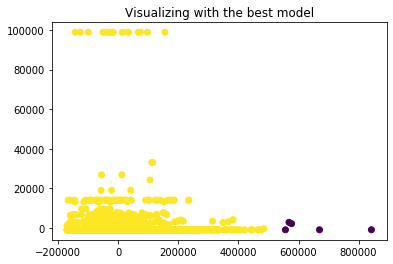

In [47]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 

models = {'cosine_comp':cos_comp_f1,'euclidean_comp':euc_comp_f1,'manhattan_comp':man_comp_f1,'cosine_avg':cos_avg_f1,'euclidean_avg':euc_avg_f1,'manhattan_avg':man_avg_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cosine_comp':
    best_model = cosine_comp

elif best_model_val == 'euclidean_comp':
    best_model = euclidean_comp

elif best_model_val == 'manhattan_comp':
    best_model = manhattan_comp

elif best_model_val == 'cosine_avg':
    best_model = cosine_avg

elif best_model_val == 'euclidean_avg':
    best_model = euclidean_avg

elif best_model_val == 'manhattan_avg':
    best_model = manhattan_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_training)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:,0]
y = X_train_pca[:,1]

#Plotting the graphs
plt.scatter(x,y,c=best_model)
plt.title("Visualizing with the best model")
plt.show()
###################end code for Task 2-b

# TASK 3:  WEKA Visualization of K-means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a : Visualize the k-means clustering using weka

###################start Task 3-a
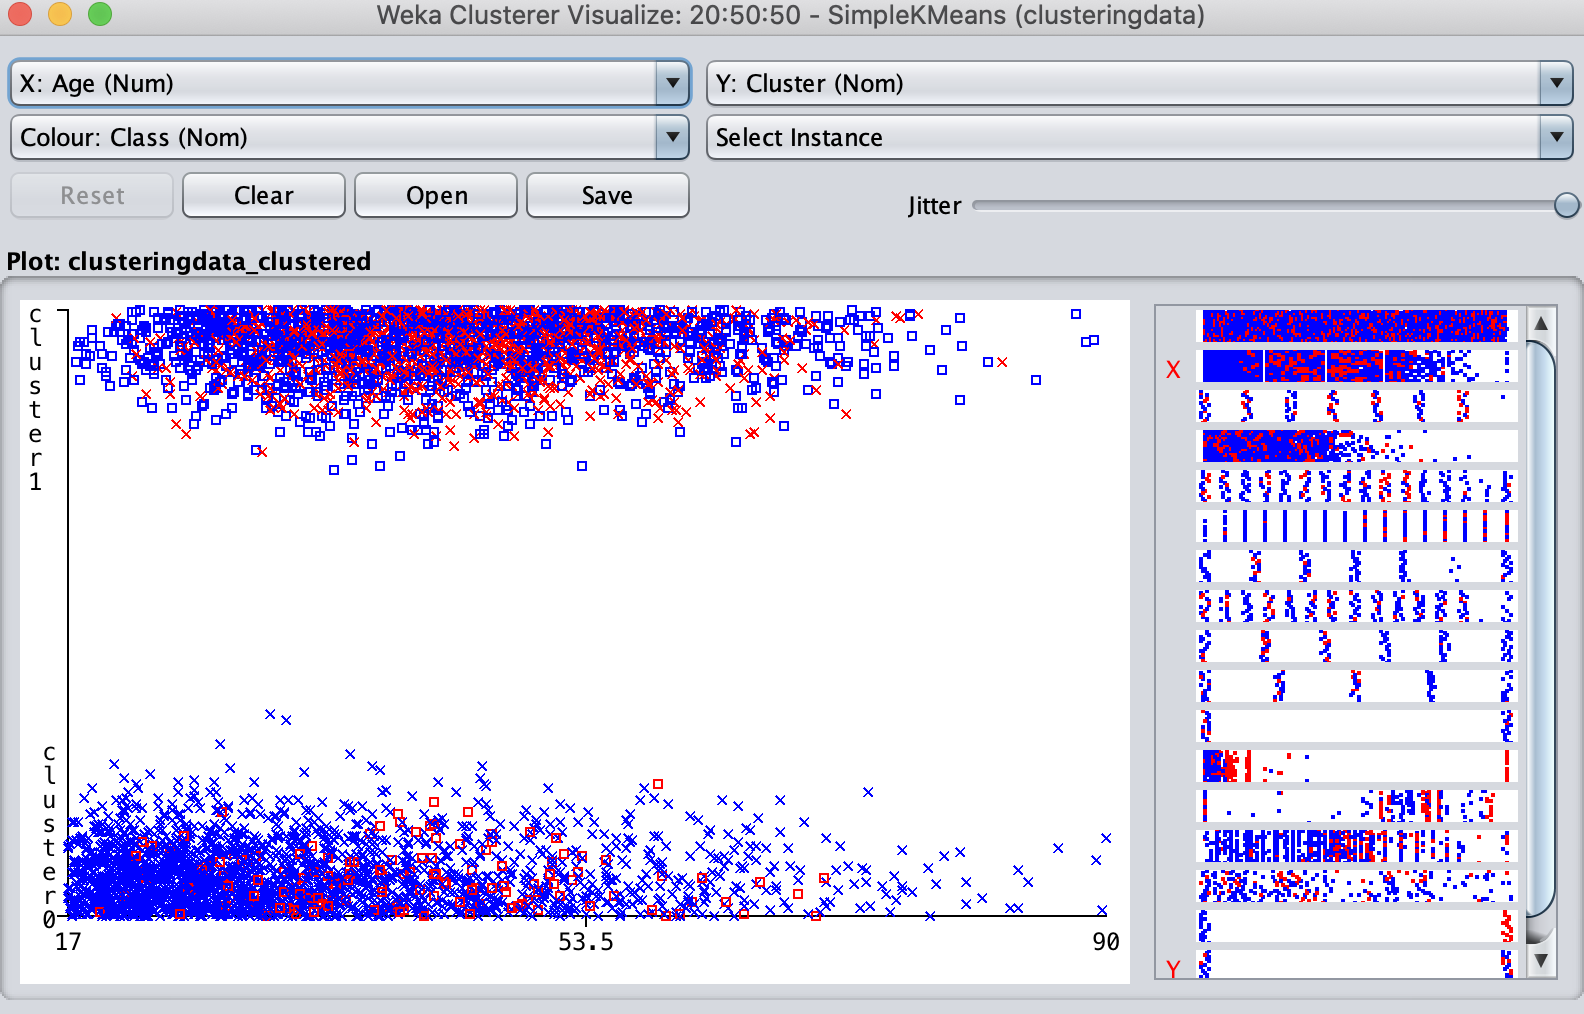
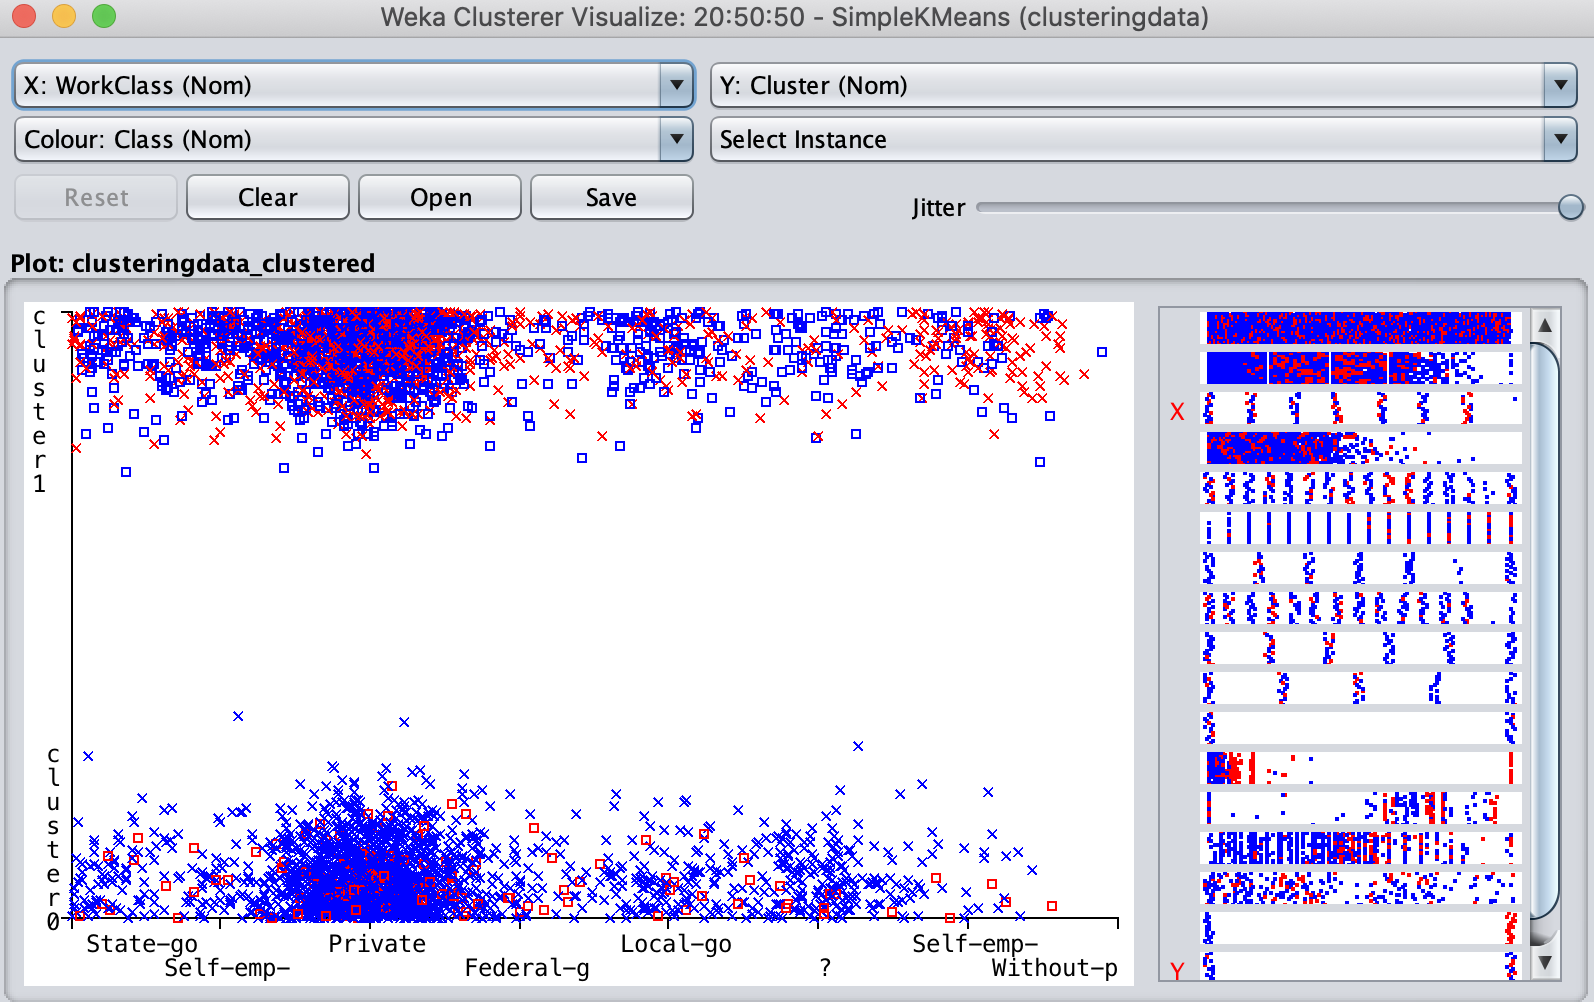
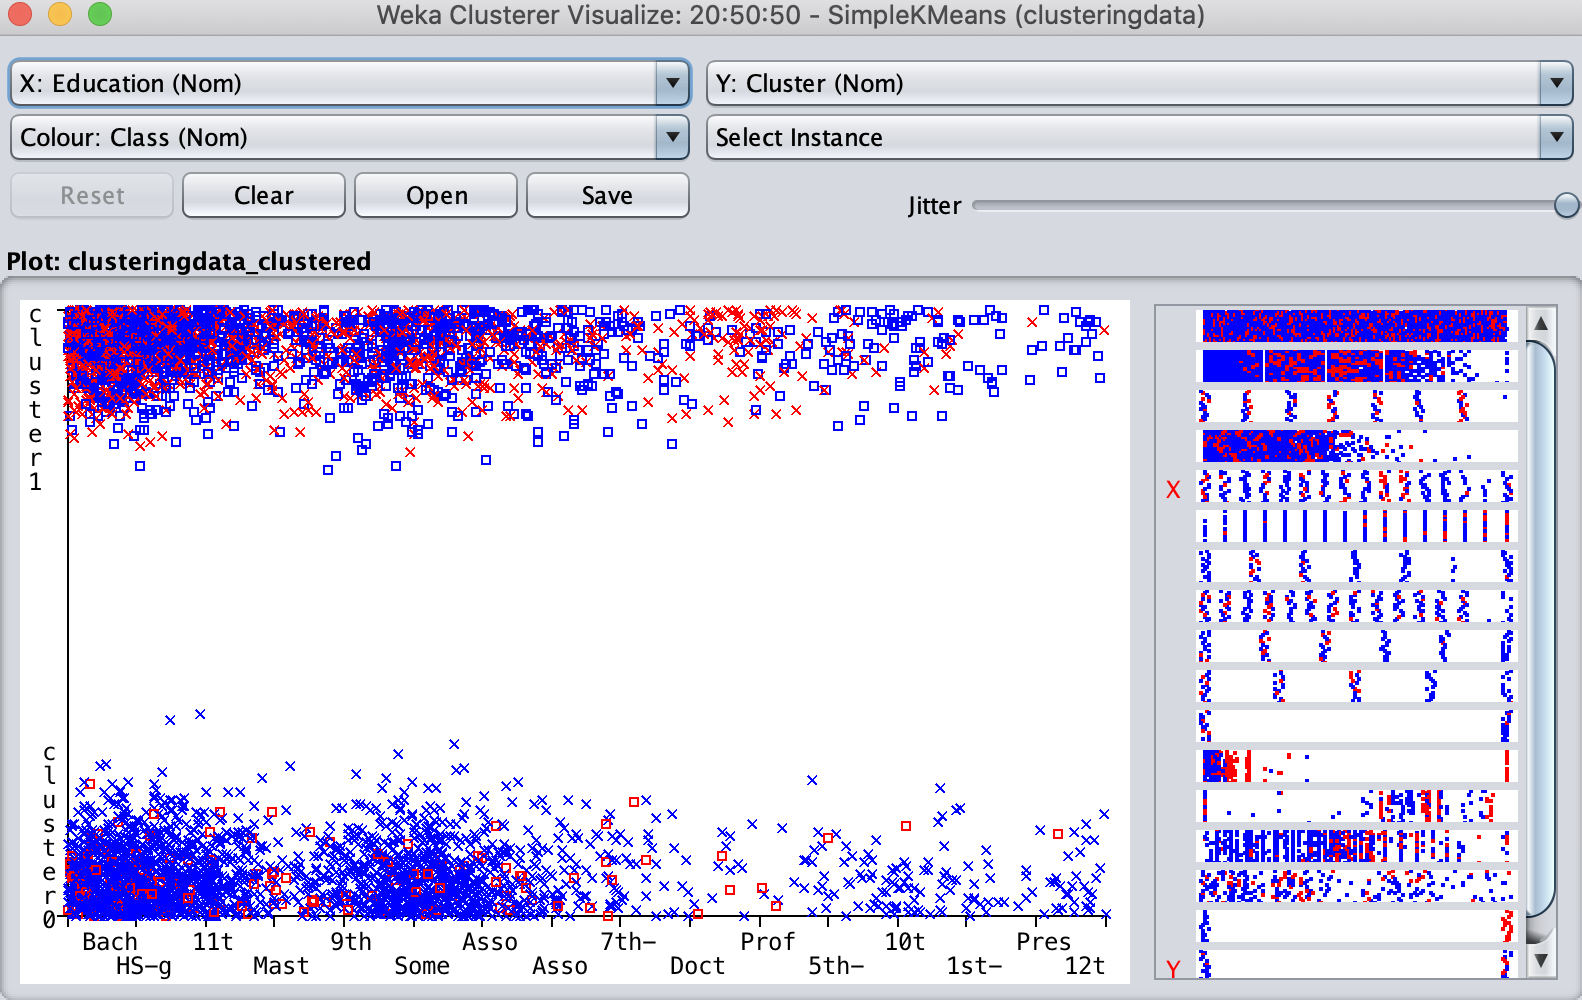
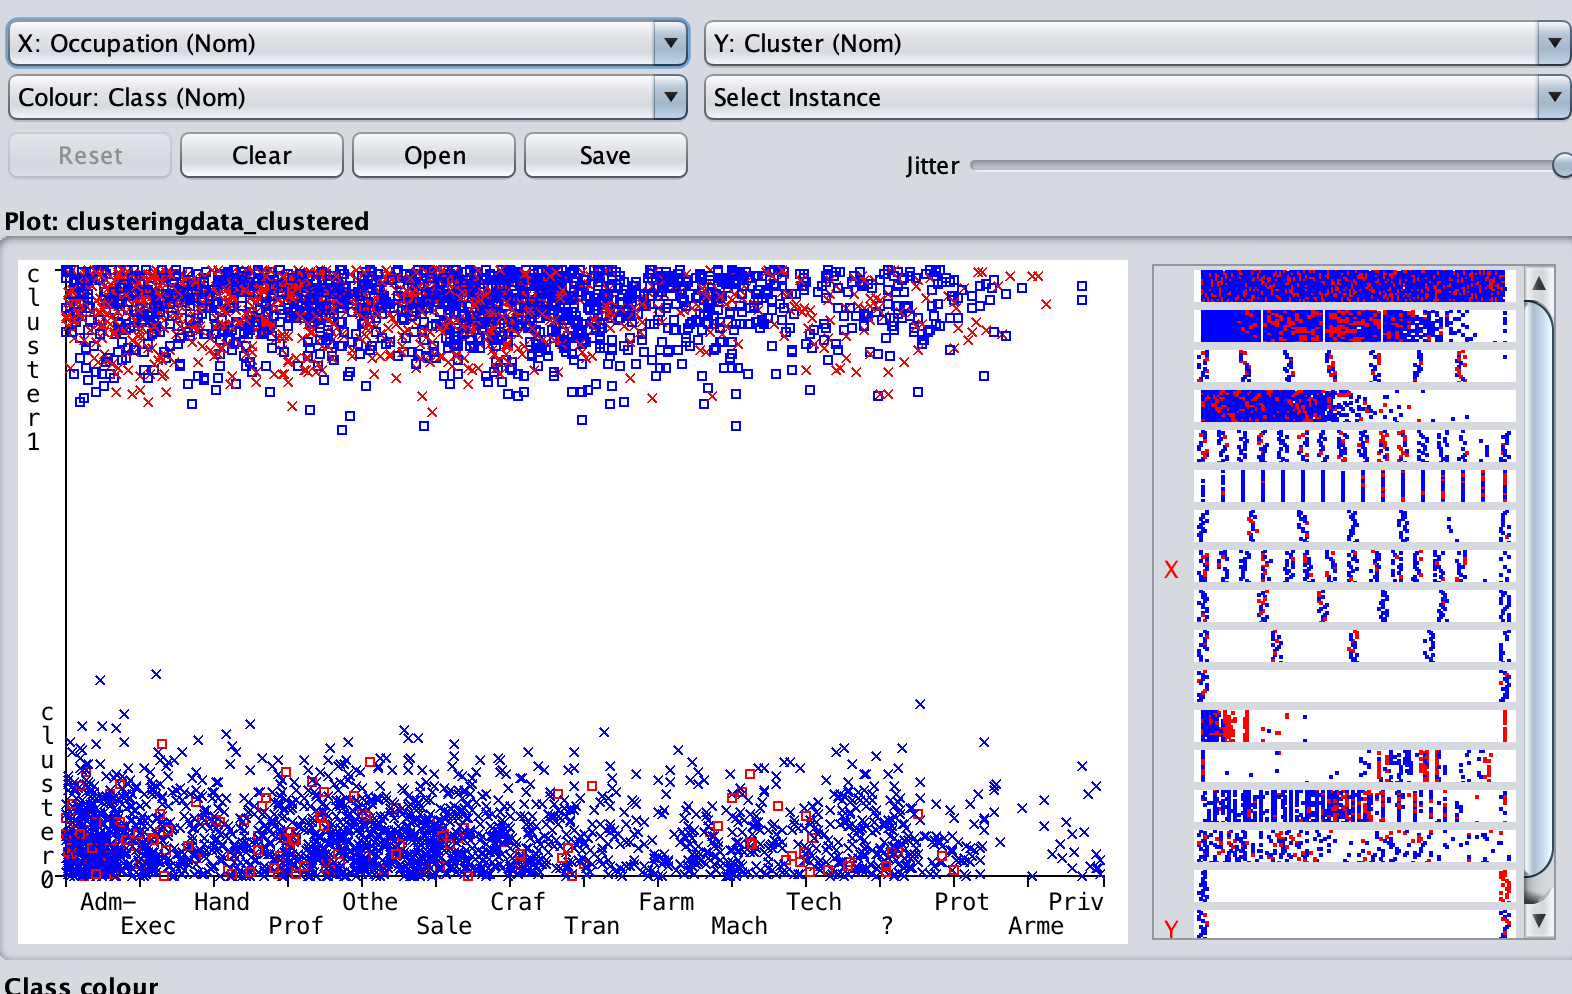
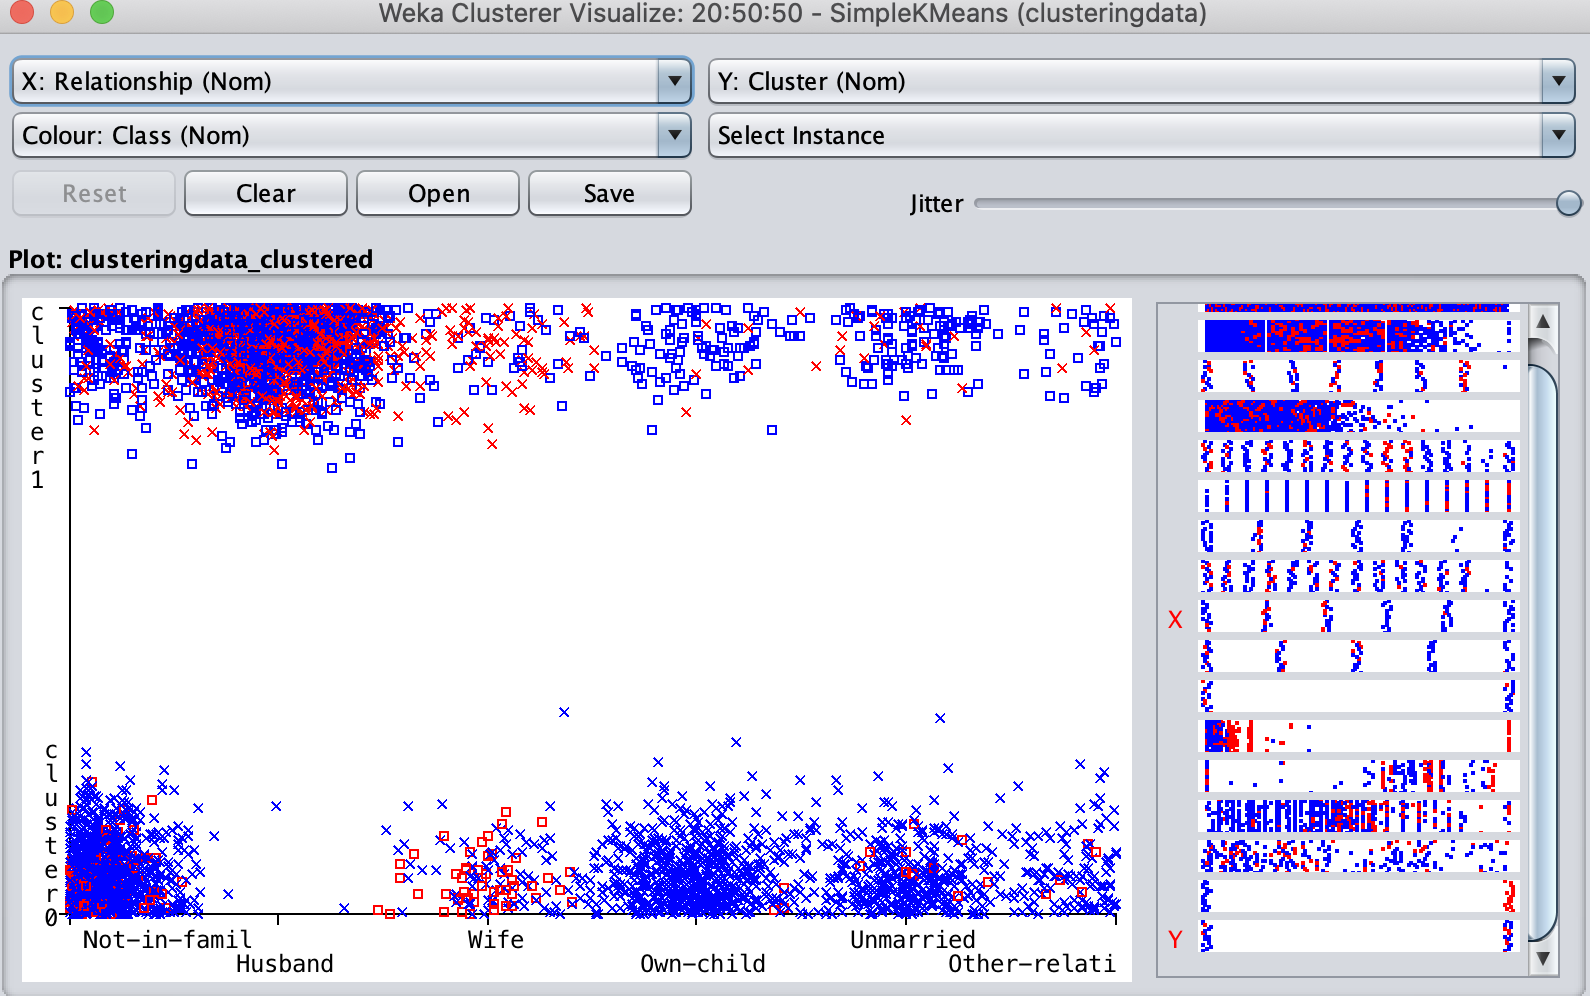

###################end Task 3-a

In [48]:
## Task 3-b : Visualize the hierarchical clustering using weka

###################start Task 3-b

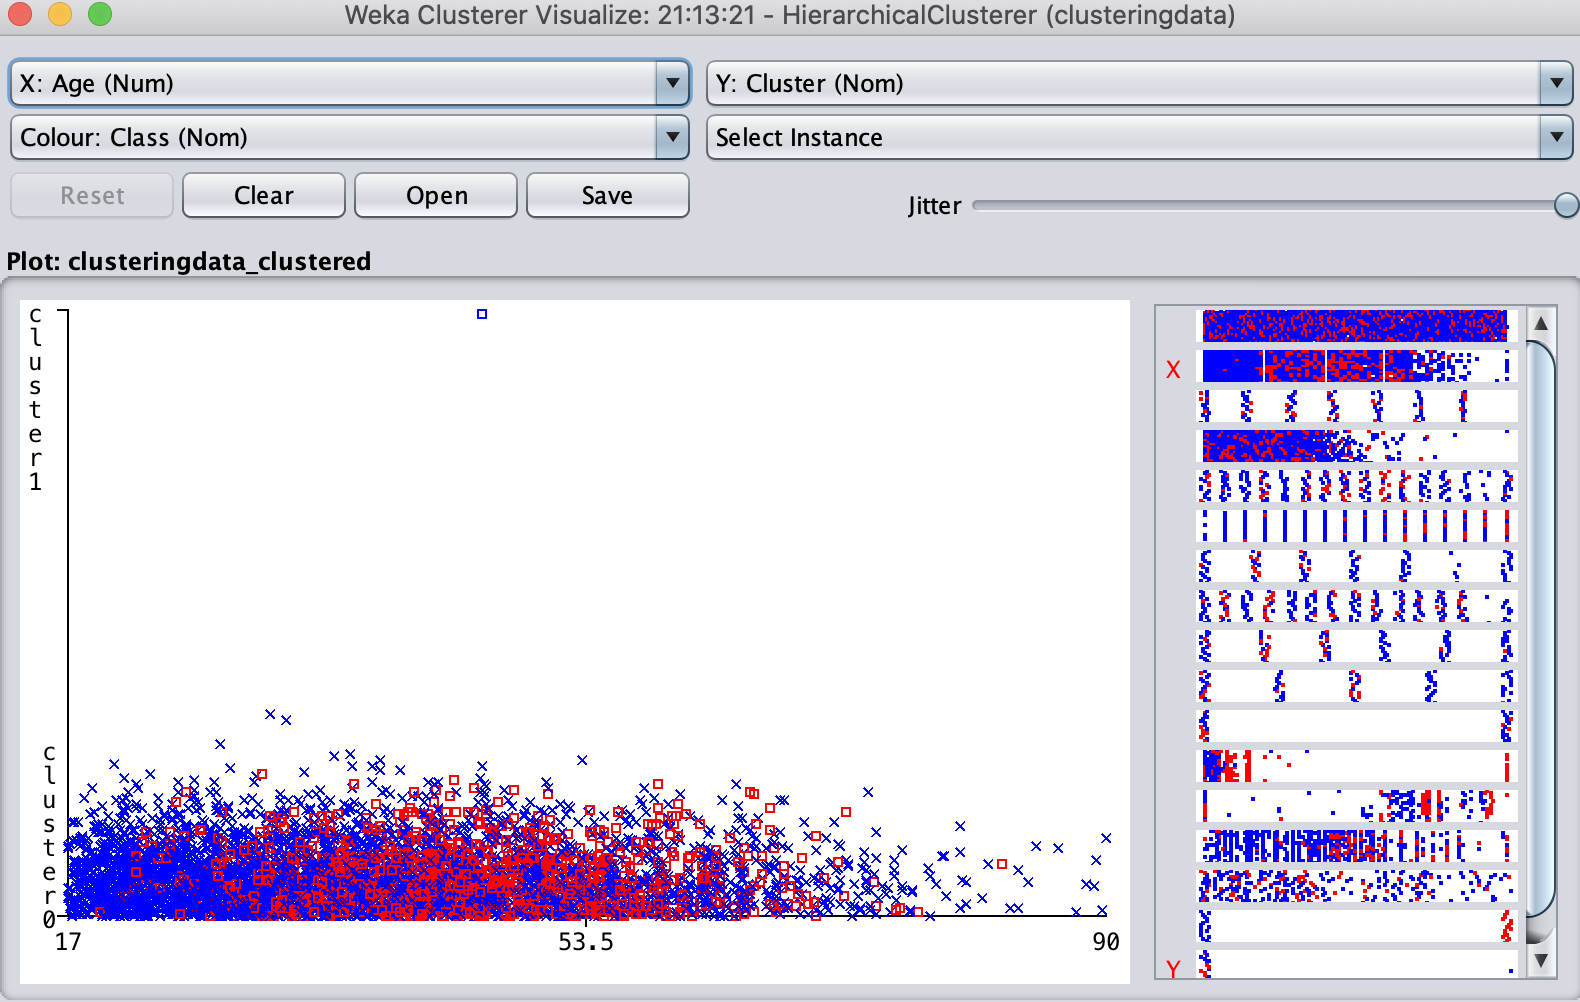
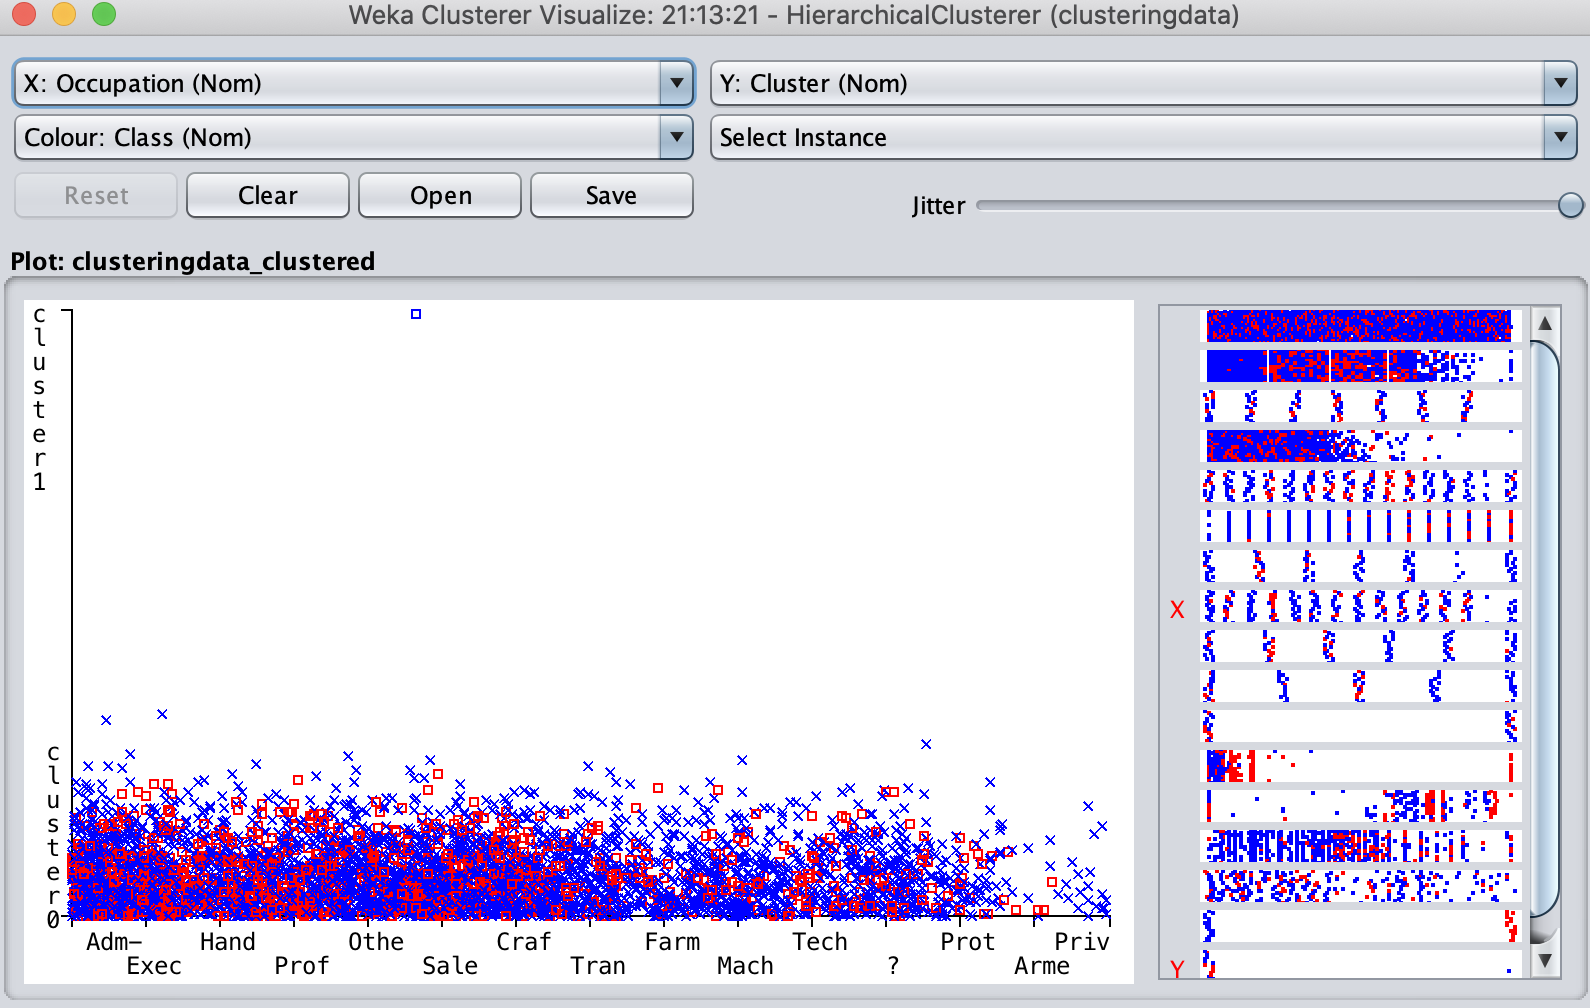
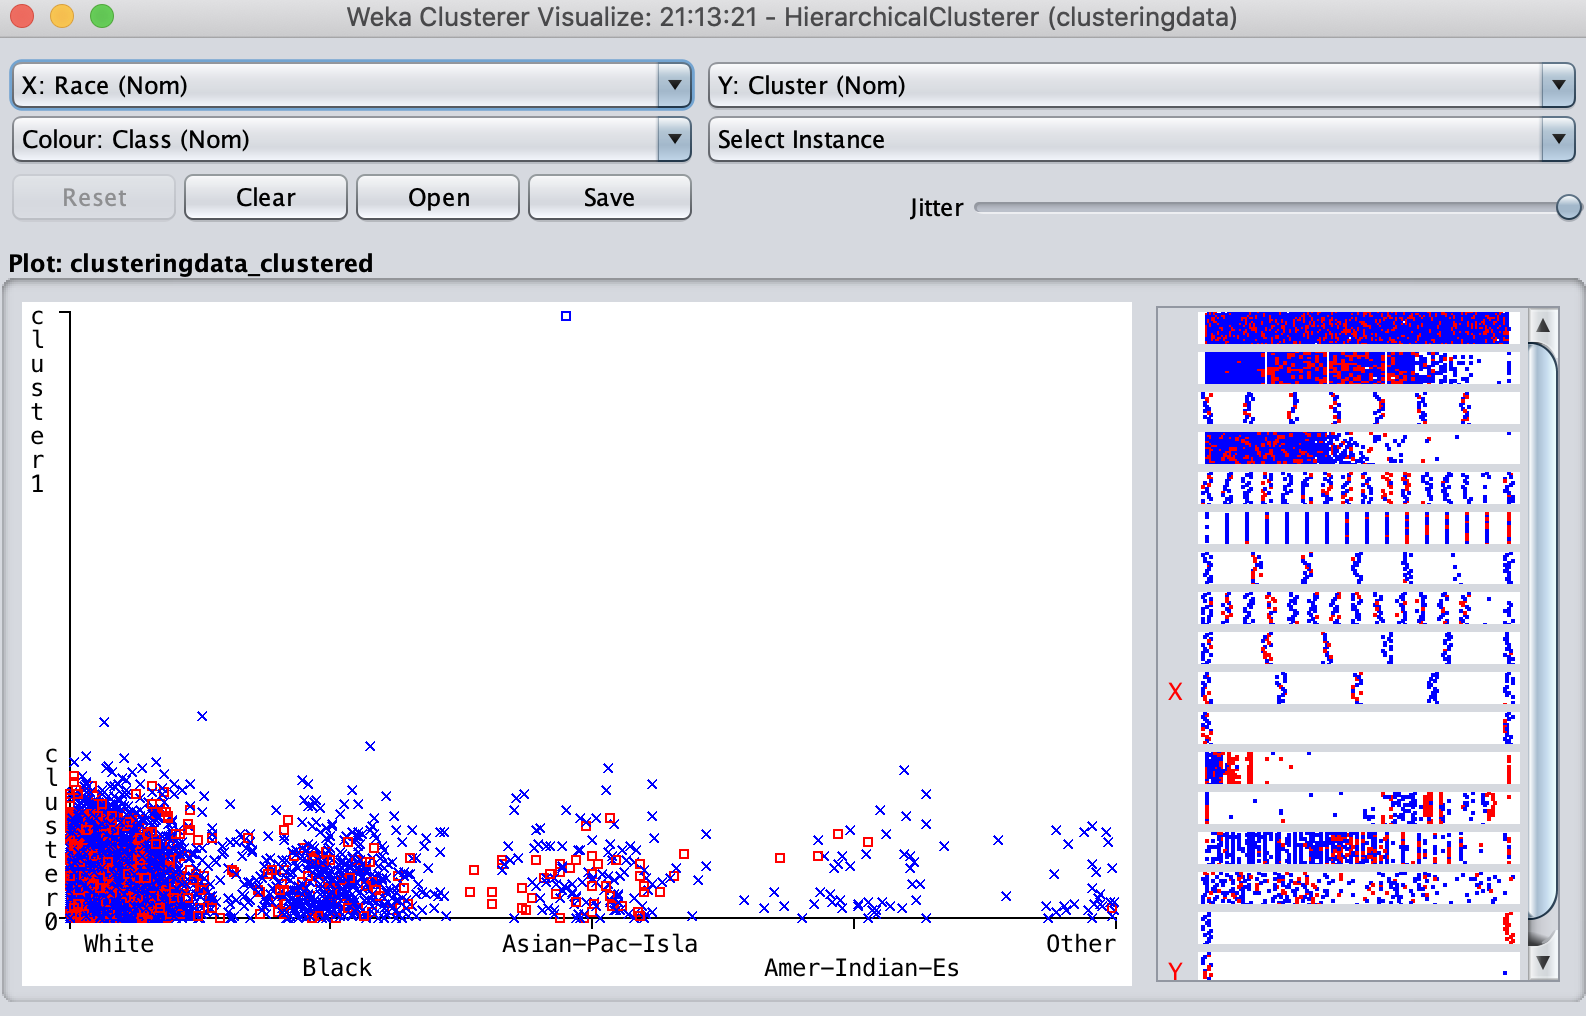
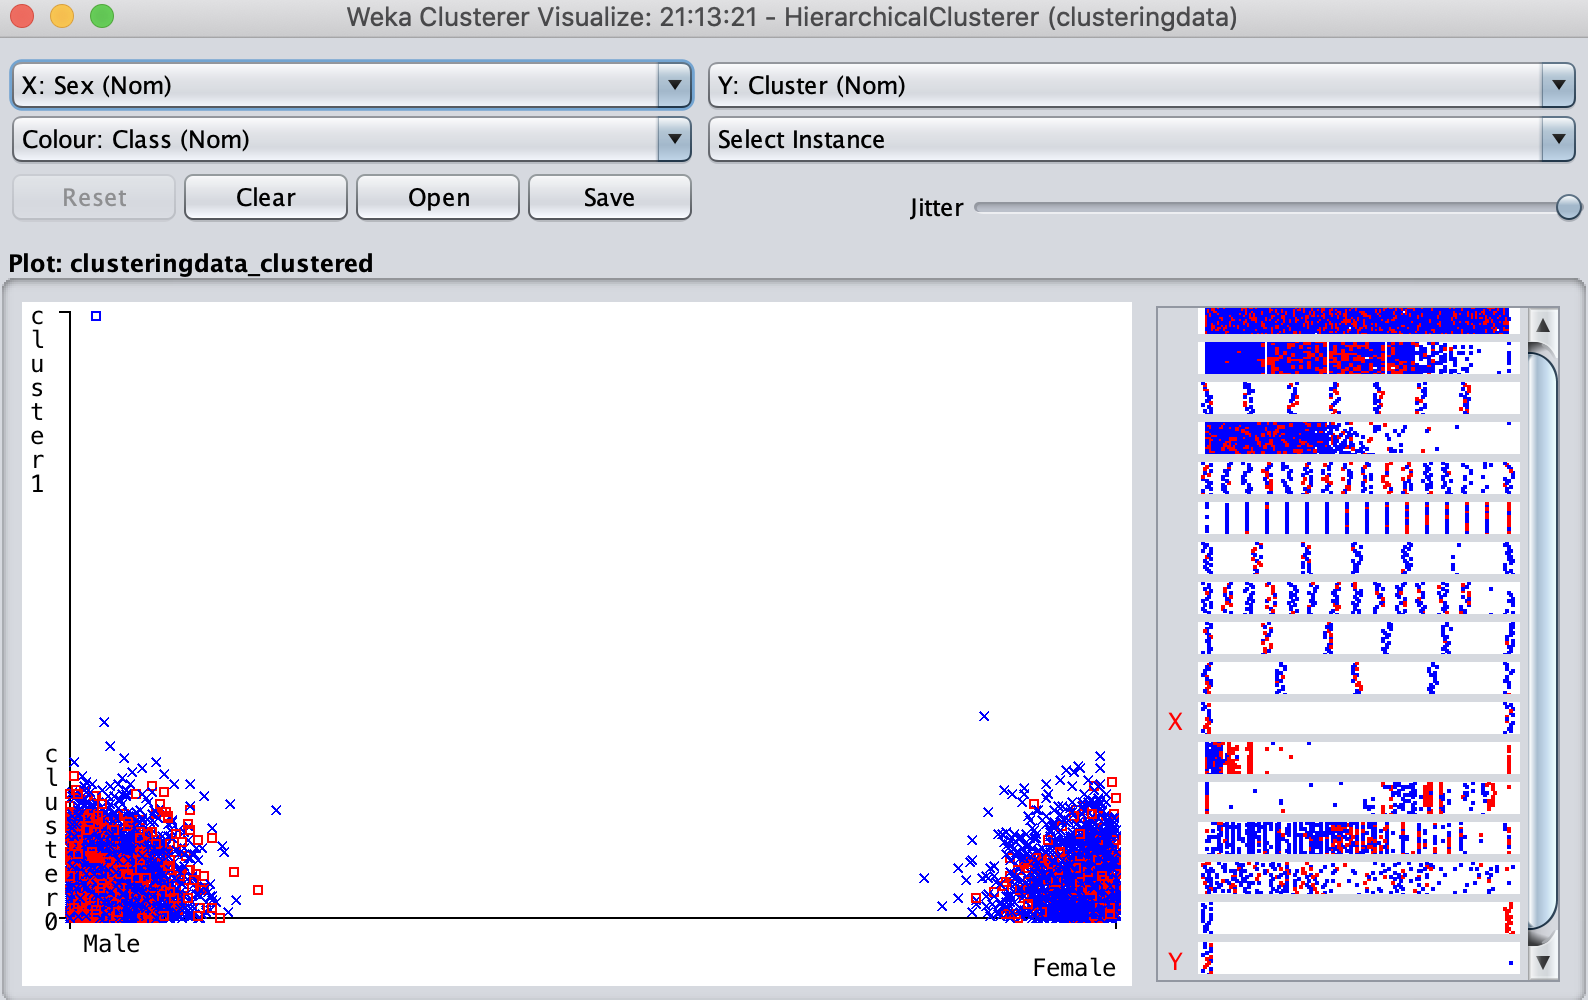

###################end Task 3-b

# (BONUS)
# TASK 4:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 4-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

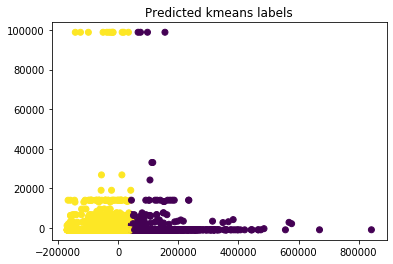

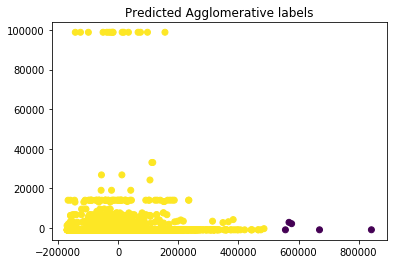

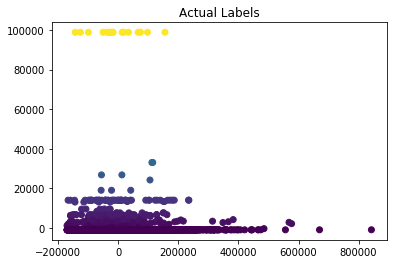

In [49]:
###################begin code for Task 4-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = df_data[df_data.columns[:-1]]
y = df_data[df_data.columns[-1]]

kmeans_data = KMeans(n_clusters=2,random_state=0)
kmeans_data_fit = kmeans_data.fit_predict(X)


### Agglomerative Clustering
# Calculate pairwise distance matrix for X

cosine_distance = pairwise_distances(X_training,metric='cosine')
euclidean_distance = pairwise_distances(X_training,metric='euclidean')
manhattan_distance = pairwise_distances(X_training,metric='manhattan')

#Here we use the methods used in both 2-a and 2-b

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)

cosine_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cos_comp_f1 = f1_score(y_training,cosine_comp)
euclidean_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euc_comp_f1 = f1_score(y_training,euclidean_comp)
manhattan_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
man_comp_f1 = f1_score(y_training,manhattan_comp)
cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cos_avg_f1 = f1_score(y_training,cosine_avg)
euclidean_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euc_avg_f1 = f1_score(y_training,euclidean_avg)
manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
man_avg_f1 = f1_score(y_training,manhattan_avg)

models = {'cosine_comp':cos_comp_f1,'euclidean_comp':euc_comp_f1,'manhattan_comp':man_comp_f1,'cosine_avg':cos_avg_f1,'euclidean_avg':euc_avg_f1,'manhattan_avg':man_avg_f1}
best_model_val = max(models,key=models.get)
if best_model_val == 'cosine_comp':
    best_model = cosine_comp
elif best_model_val == 'euclidean_comp':
    best_model = euclidean_comp
elif best_model_val == 'manhattan_comp':
    best_model = manhattan_comp
elif best_model_val == 'cosine_avg':
    best_model = cosine_avg   
elif best_model_val == 'euclidean_avg':
    best_model = euclidean_avg
elif best_model_val == 'manhattan_avg':
    best_model = manhattan_avg
else:
    best_model = None

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_training)
x = X_pca[:,0]
y = X_pca[:,1]


# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.scatter(x,y,c=clusterindex)
plt.title("Predicted kmeans labels")
plt.show()
plt.scatter(x,y,c=best_model)
plt.title("Predicted Agglomerative labels")
plt.show()
plt.title("Actual Labels")
plt.scatter(x,y,c=y)#actual
plt.show()
###################end code for Task 4-a

## Task 4-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [50]:
###################begin code for Task 4-b
X = df_data[df_data.columns[:-1]]
y = df_data[df_data.columns[-1]]
print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y,kmeans_data_fit)
agglo_conf = confusion_matrix(y_training,best_model)

#Print confusion matrix of kmeans
print("Kmeans:")
print(kmeans_conf)

#Print confusion matrix of Agglomerative
print("\nAgglomerative:")
print(agglo_conf)

#Print Precision of Kmeans and Agglomerative
print("\nPrecision\n")
kmeans_prec = precision_score(y,kmeans_data_fit)
agglo_prec = precision_score(y_training,best_model)
print("Kmeans:")
print(kmeans_prec)
print("Agglomerative:")
print(agglo_prec)
print("\nAgglomerative Clustering method has higher precision value than Kmeans Clustering\n")

#Print Recall of Kmeans and Agglomerative
print("\nRecall\n")
kmeans_recall = recall_score(y,kmeans_data_fit)
agglo_recall = recall_score(y_training,best_model)
print("Kmeans:")
print(kmeans_recall)
print("Agglomerative:")
print(agglo_recall)
print("\nAgglomerative Clustering method has higher recall value than Kmeans Clustering\n")
#Print F1 Score of Kmeans and Agglomerative
print("\nF1 Score\n")
kmeans_score = f1_score(y,kmeans_data_fit)
agglo_score = f1_score(y_training,best_model)
print("Kmeans:")
print(kmeans_score)
print("Agglomerative:")
print(agglo_score)
print("\nAgglomerative Clustering method has higher F1 value than Kmeans Clustering\n")
print("\nReasoning based on the above results:")
print("Based on the results, its obvious that Agglomerative Clustering is better than K-Means since Aggloemrative method finds points that are closest to \neach other and successively groups them together. The operation is sequential and yields better results as compared to K-Means, in which \nthe data is divided into k-sets simultaneously. Also K-Means does not provide desired results if the data is not well separated\n")
###################end code for Task 4-b

Confusion matrix

Kmeans:
[[2712 1067]
 [ 927  294]]

Agglomerative:
[[   3 2646]
 [   2  849]]

Precision

Kmeans:
0.216017634092579
Agglomerative:
0.2429184549356223

Agglomerative Clustering method has higher precision value than Kmeans Clustering


Recall

Kmeans:
0.24078624078624078
Agglomerative:
0.9976498237367802

Agglomerative Clustering method has higher recall value than Kmeans Clustering


F1 Score

Kmeans:
0.22773044151820293
Agglomerative:
0.3907040957202025

Agglomerative Clustering method has higher F1 value than Kmeans Clustering


Reasoning based on the above results:
Based on the results, its obvious that Agglomerative Clustering is better than K-Means since Aggloemrative method finds points that are closest to 
each other and successively groups them together. The operation is sequential and yields better results as compared to K-Means, in which 
the data is divided into k-sets simultaneously. Also K-Means does not provide desired results if the data is not well sep

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[30 points] Task 1:</b>  

    [05 points] Task 1-a: Determine “k” value from the elbow method

    [20 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [05 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [05 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[30 points] Task 2:</b>  

    [20 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering

<b>[40 points] Task 3 (BONUS):</b> 

    Task 3-a: 20 points

    Task 3-b: 20 points

<b>[20 points] Task 4 (BONUS):</b> 

    Task 4-a: 10 points

    Task 4-b: 10 points